In [138]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [139]:
# importing datasets
dataframe = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [140]:
dataframe['ObservationDate'] = pd.to_datetime(dataframe['ObservationDate'])

In [141]:
world_latest = dataframe[dataframe['ObservationDate'] == max(dataframe['ObservationDate'])].reset_index()
china_latest = world_latest[world_latest['Country/Region']=='Mainland China']
other_latest = world_latest[world_latest['Country/Region']!='Mainland China']

world_latest_severity = world_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
china_latest_severity = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
other_latest_severity = other_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
world_latest


,index,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2585,2586,2020-02-28,Hubei,Mainland China,2020-02-28T00:43:01,65914.0,2682.0,26403.0
1,2586,2587,2020-02-28,NaN,South Korea,2020-02-28T08:53:03,2337.0,13.0,22.0
2,2587,2588,2020-02-28,Guangdong,Mainland China,2020-02-28T08:53:03,1348.0,7.0,935.0
3,2588,2589,2020-02-28,Henan,Mainland China,2020-02-28T09:23:02,1272.0,20.0,1112.0
4,2589,2590,2020-02-28,Zhejiang,Mainland China,2020-02-28T10:03:12,1205.0,1.0,975.0
...,...,...,...,...,...,...,...,...,...
109,2694,2695,2020-02-28,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0
110,2695,2696,2020-02-28,"Tempe, AZ",US,2020-02-25T21:23:03,1.0,0.0,1.0
111,2696,2697,2020-02-28,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
112,2697,2698,2020-02-28,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [142]:
world_latest_severity = world_latest_severity.sort_values(by='Confirmed', ascending=False)
world_latest_severity = world_latest_severity.reset_index(drop=True)
world_latest_severity

,Country/Region,Confirmed,Deaths,Recovered
0,Mainland China,78824.0,2788.0,36291.0
1,South Korea,2337.0,13.0,22.0
2,Italy,888.0,21.0,46.0
3,Others,705.0,1.0,10.0
4,Iran,388.0,34.0,73.0
...,...,...,...,...
56,Nepal,1.0,0.0,1.0
57,Netherlands,1.0,0.0,0.0
58,New Zealand,1.0,0.0,0.0
59,Nigeria,1.0,0.0,0.0


In [143]:
china_latest_severity = china_latest_severity.sort_values(by='Confirmed', ascending=False)
china_latest_severity = china_latest_severity.reset_index(drop=True)
china_latest_severity

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,65914.0,2682.0,26403.0
1,Guangdong,1348.0,7.0,935.0
2,Henan,1272.0,20.0,1112.0
3,Zhejiang,1205.0,1.0,975.0
4,Hunan,1017.0,4.0,830.0
5,Anhui,990.0,6.0,821.0
6,Jiangxi,935.0,1.0,790.0
7,Shandong,756.0,6.0,405.0
8,Jiangsu,631.0,0.0,515.0
9,Chongqing,576.0,6.0,422.0


**China severity level**

In [144]:
cols=china_latest_severity.keys()
dataset=china_latest_severity.loc[:,cols[1]:cols[-1]]
nameset=china_latest_severity.loc[:,cols[0]]

In [145]:
from sklearn.cluster import KMeans
data = dataset.values
cityName = nameset.values
km = KMeans(n_clusters=4)
label = km.fit_predict(data)
mysum = np.sum(km.cluster_centers_,axis=1)
mysum = np.log(mysum)
#print(severity level)
ProvinceCluster = [[],[],[],[]]
for i in range(len(cityName)):
    ProvinceCluster[label[i]].append(cityName[i])
for i in range(len(ProvinceCluster)):
    print("cluster %s:" %(i+1))
    print("severity level:%s" %mysum[i])
    print(ProvinceCluster[i])

cluster 1:
severity level:5.4619762710273525
['Fujian', 'Guangxi', 'Shaanxi', 'Yunnan', 'Hainan', 'Guizhou', 'Tianjin', 'Shanxi', 'Liaoning', 'Jilin', 'Gansu', 'Xinjiang', 'Inner Mongolia', 'Ningxia', 'Qinghai', 'Tibet']
cluster 2:
severity level:11.461621644211487
['Hubei']
cluster 3:
severity level:7.623071565563128
['Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui', 'Jiangxi']
cluster 4:
severity level:6.754895432337801
['Shandong', 'Jiangsu', 'Chongqing', 'Sichuan', 'Heilongjiang', 'Beijing', 'Shanghai', 'Hebei']


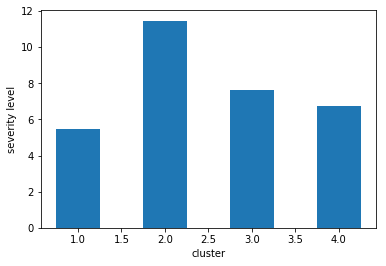

In [146]:
plt.xlabel('cluster')
plt.ylabel('severity level')
plt.bar([1,2,3,4],mysum,width=0.5)
plt.show()

**World severity level**

In [147]:
cols=world_latest_severity.keys()
dataset=world_latest_severity.loc[:,cols[1]:cols[-1]]
nameset=world_latest_severity.loc[:,cols[0]]

In [148]:
data = dataset.values
countryName = nameset.values
km = KMeans(n_clusters=6)
label = km.fit_predict(data)
mysum = np.sum(km.cluster_centers_,axis=1)
mysum = np.log(mysum)
#print(severity level)
CountryCluster = [[],[],[],[],[],[]]
for i in range(len(countryName)):
    CountryCluster[label[i]].append(countryName[i])
for i in range(len(CountryCluster)):
    print("cluster %s:" %(i+1))
    print("severity level:%s" %mysum[i])
    print(CountryCluster[i])

cluster 1:
severity level:4.317488113536311
['Hong Kong', 'Singapore', 'US', 'France', 'Germany', 'Kuwait', 'Thailand', 'Bahrain', 'Taiwan']
cluster 2:
severity level:11.677617531494358
['Mainland China']
cluster 3:
severity level:7.771488760117616
['South Korea']
cluster 4:
severity level:6.728030348035448
['Italy', 'Others']
cluster 5:
severity level:1.9764935724271988
['Spain', 'Australia', 'Malaysia', 'UK', 'United Arab Emirates', 'Vietnam', 'Canada', 'Macau', 'Switzerland', 'Sweden', 'Iraq', 'Norway', 'Croatia', 'Israel', 'Greece', 'Oman', 'India', 'Romania', 'Philippines', 'Austria', 'Finland', 'Lebanon', 'Russia', 'Pakistan', 'Sri Lanka', 'San Marino', ' Azerbaijan', 'North Macedonia', 'Estonia', 'Algeria', 'Belarus', 'Belgium', 'Brazil', 'Cambodia', 'Denmark', 'Egypt', 'Georgia', 'North Ireland', 'Iceland', 'Afghanistan', 'Mexico', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Lithuania']
cluster 6:
severity level:5.925591802957274
['Iran', 'Japan']


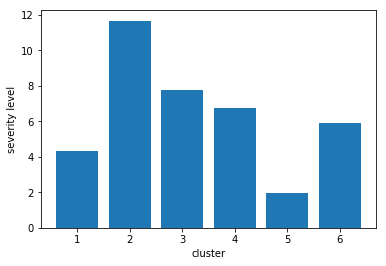

In [149]:
plt.xlabel('cluster')
plt.ylabel('severity level')
plt.bar([1,2,3,4,5,6],mysum)
plt.show()